# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane were more efficient treatments than Infubinol and Ceftamin - the mice treated with these had a lower final tumor volume than the other two treatments. Capomulin and Ramicane were also the two treatments used most often, as seen in the bar graph. I also found a strong correlation betwen mouse weight and tumor volume, with r = .84. As the weight of the mouse increases, so does the volume of the tumor. 


In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined = pd.merge(mouse_metadata, study_results, how='right', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mouse_study_combined.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [48]:
# Checking the number of mice.m
mouse_number = mouse_study_combined['Mouse ID'].nunique()
mouse_number

249

In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_combined.loc[mouse_study_combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_study_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              45.000000                 0  
2              45.000000                 0  
3              45.000000                 0  
4              45.000000                 0  
...                  ...               ...  
1888           41.581521                 2  
1889           31.023923                 3  
1890           61.433892                 1  
1891           58.634971                 4  
1892           72.555239                 2  

[1888 rows x 8 columns]

In [51]:
# Checking the number of mice in the clean DataFrame.
new_mouse_number = mouse_study_df['Mouse ID'].nunique()
new_mouse_number

249

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = mouse_study_df['Tumor Volume (mm3)'].groupby(mouse_study_df['Drug Regimen']).mean()
tumor_median = mouse_study_df['Tumor Volume (mm3)'].groupby(mouse_study_df['Drug Regimen']).median()
tumor_variance = mouse_study_df['Tumor Volume (mm3)'].groupby(mouse_study_df['Drug Regimen']).var()
tumor_std = mouse_study_df['Tumor Volume (mm3)'].groupby(mouse_study_df['Drug Regimen']).std()
tumor_sem = mouse_study_df['Tumor Volume (mm3)'].groupby(mouse_study_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({
    'Tumor Mean':tumor_mean,
    'Tumor Median':tumor_median,
    'Tumor Variance':tumor_variance,
    'Tumor Standard Deviation':tumor_std,
    'Tumor SEM':tumor_sem}
)
tumor_summary_df.head()

Tumor Mean  Tumor Median  Tumor Variance  \
Drug Regimen                                             
Capomulin      40.675741     41.557809       24.947764   
Ceftamin       52.591172     51.776157       39.290177   
Infubinol      52.884795     51.820584       43.128684   
Ketapril       55.235638     53.698743       68.553577   
Naftisol       54.331565     52.509285       66.173479   

              Tumor Standard Deviation  Tumor SEM  
Drug Regimen                                       
Capomulin                     4.994774   0.329346  
Ceftamin                      6.268188   0.469821  
Infubinol                     6.567243   0.492236  
Ketapril                      8.279709   0.603860  
Naftisol                      8.134708   0.596466

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

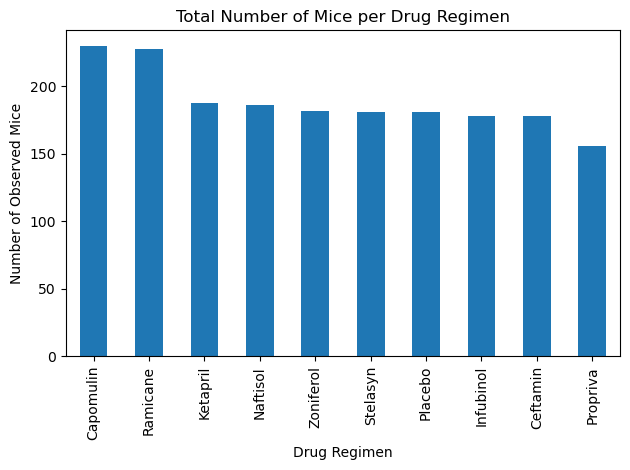

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = mouse_study_df['Drug Regimen'].value_counts()
mouse_count.plot.bar()
plt.title('Total Number of Mice per Drug Regimen')
plt.ylabel('Number of Observed Mice')
plt.tight_layout()
plt.show()

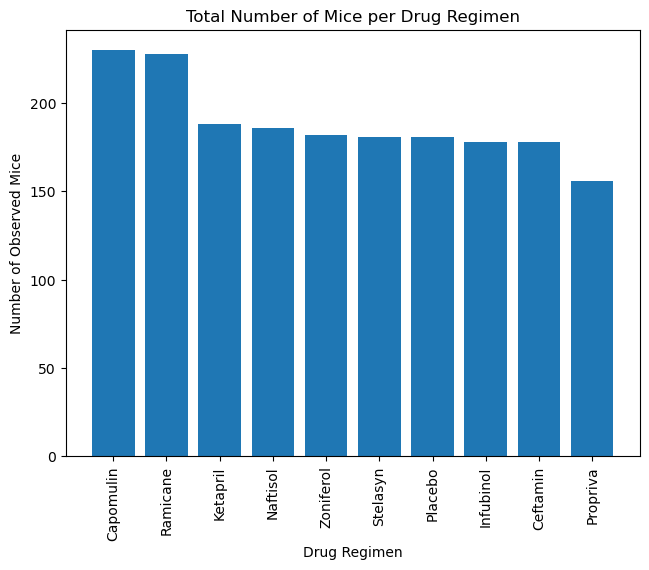

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_count.index.values, mouse_count.values)
plt.tight_layout()
plt.xticks(rotation = 'vertical')
plt.title('Total Number of Mice per Drug Regimen')
plt.ylabel('Number of Observed Mice')
plt.xlabel('Drug Regimen')
plt.show()


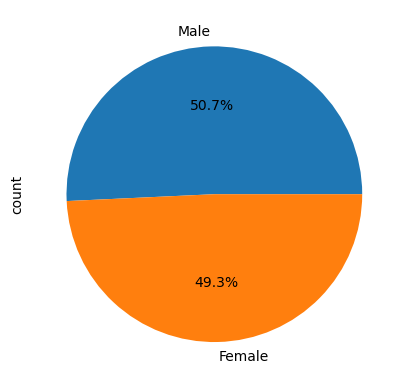

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_of_mice = mouse_study_df["Sex"].value_counts()
sex_of_mice.plot.pie(autopct="%1.1f%%")
plt.show()

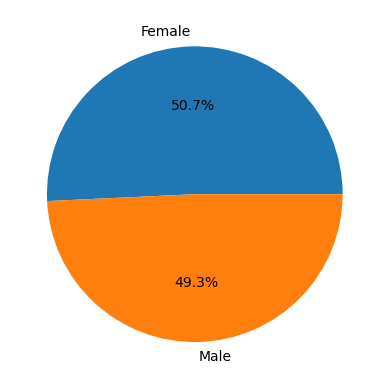

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_of_mice, labels=['Female','Male'], autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_timepoint, mouse_study_df, how='left', on=['Mouse ID', 'Timepoint'])
tumor_volume_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
244           48.710661                 0  
245           30.638696                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4  

[249 rows x 8 columns]

In [86]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f'{drug} - potential outliers: below {lower_bound} or above {upper_bound}')

Capomulin - potential outliers: below 20.70456164999999 or above 51.83201549
Ramicane - potential outliers: below 17.912664470000003 or above 54.30681135
Infubinol - potential outliers: below 36.83290494999999 or above 82.74144559000001
Ceftamin - potential outliers: below 25.355449580000002 or above 87.66645829999999


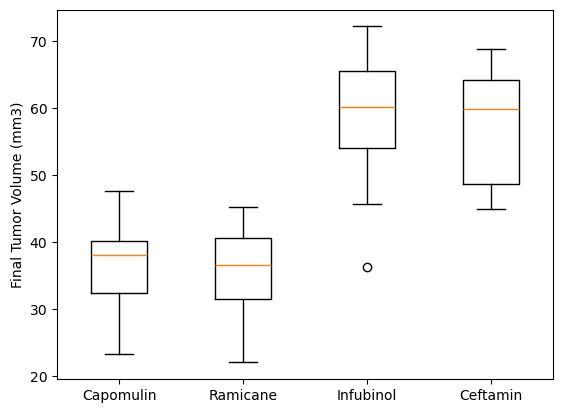

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.show()

## Line and Scatter Plots

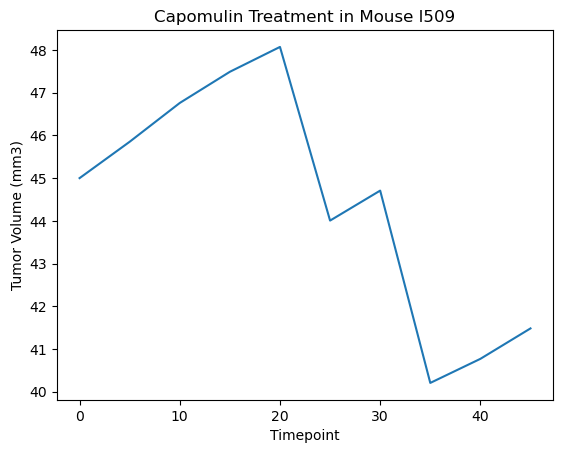

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
mousel509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]

x_axis = mousel509["Timepoint"]
l509tumor = mousel509["Tumor Volume (mm3)"]
plt.plot(x_axis, l509tumor)
plt.title('Capomulin Treatment in Mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

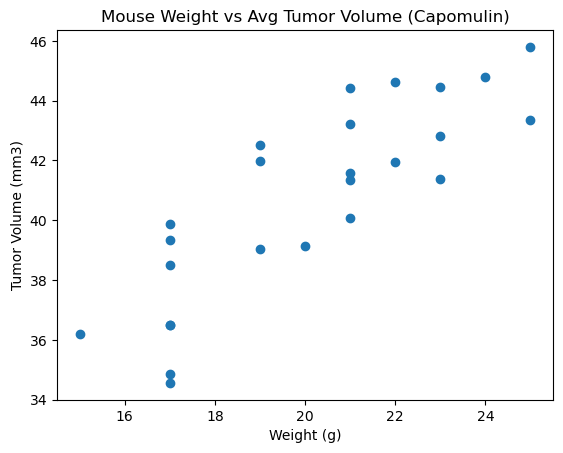

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capomulin = capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Avg Tumor Volume (Capomulin)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation coefficiant between mouse weight and tumor volume is 0.84


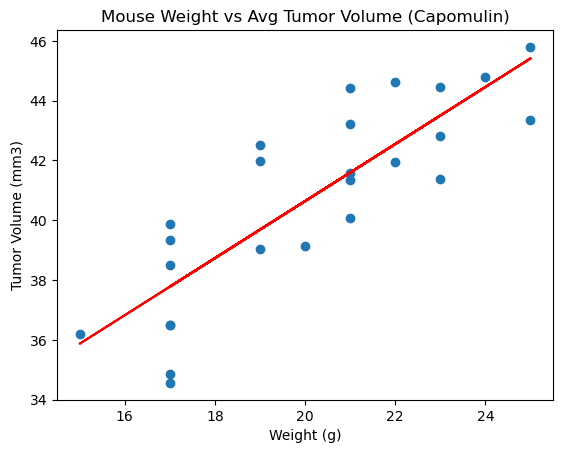

In [113]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
r = round(st.pearsonr(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])[0],2)
print(f'The correlation coefficiant between mouse weight and tumor volume is {r}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
regress_values = avg_capomulin['Weight (g)'] * slope + intercept

plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
plt.plot(avg_capomulin['Weight (g)'],regress_values,"r-")
plt.title('Mouse Weight vs Avg Tumor Volume (Capomulin)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()